In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv(r"C:\Users\Jishanth M I\Downloads\DS1_C5_S4_Credit_Data_Hackathon.csv")
df

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Jishanth M I\\Downloads\\DS1_C5_S4_Credit_Data_Hackathon.csv'

In [4]:
df.shape

(100000, 24)

In [5]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'GENDER', 'Car', 'House',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'DAYS_EMPLOYED', 'MOBILE', 'WORK_PHONE',
       'HOME_PHONE', 'MOBILE_REACHABLE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'APPLICATION_DAY', 'TOTAL_DOC_SUBMITTED'],
      dtype='object')

In [6]:
df.dtypes

SK_ID_CURR               int64
TARGET                   int64
NAME_CONTRACT_TYPE      object
GENDER                  object
Car                     object
House                   object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
AMT_CREDIT             float64
AMT_GOODS_PRICE        float64
NAME_TYPE_SUITE         object
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
DAYS_EMPLOYED            int64
MOBILE                   int64
WORK_PHONE               int64
HOME_PHONE               int64
MOBILE_REACHABLE         int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
APPLICATION_DAY         object
TOTAL_DOC_SUBMITTED      int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SK_ID_CURR           100000 non-null  int64  
 1   TARGET               100000 non-null  int64  
 2   NAME_CONTRACT_TYPE   100000 non-null  object 
 3   GENDER               100000 non-null  object 
 4   Car                  100000 non-null  object 
 5   House                100000 non-null  object 
 6   CNT_CHILDREN         100000 non-null  int64  
 7   AMT_INCOME_TOTAL     100000 non-null  float64
 8   AMT_CREDIT           100000 non-null  float64
 9   AMT_GOODS_PRICE      99919 non-null   float64
 10  NAME_TYPE_SUITE      99595 non-null   object 
 11  NAME_INCOME_TYPE     100000 non-null  object 
 12  NAME_EDUCATION_TYPE  100000 non-null  object 
 13  NAME_FAMILY_STATUS   100000 non-null  object 
 14  DAYS_EMPLOYED        100000 non-null  int64  
 15  MOBILE            

In [8]:
# Checking the number of missing values in each column
missing_values = df.isnull().sum()
missing_values

SK_ID_CURR                 0
TARGET                     0
NAME_CONTRACT_TYPE         0
GENDER                     0
Car                        0
House                      0
CNT_CHILDREN               0
AMT_INCOME_TOTAL           0
AMT_CREDIT                 0
AMT_GOODS_PRICE           81
NAME_TYPE_SUITE          405
NAME_INCOME_TYPE           0
NAME_EDUCATION_TYPE        0
NAME_FAMILY_STATUS         0
DAYS_EMPLOYED              0
MOBILE                     0
WORK_PHONE                 0
HOME_PHONE                 0
MOBILE_REACHABLE           0
FLAG_EMAIL                 0
OCCUPATION_TYPE        31224
CNT_FAM_MEMBERS            1
APPLICATION_DAY            0
TOTAL_DOC_SUBMITTED        0
dtype: int64

In [9]:
# Removing rows with any missing values
data= df.dropna()

cleaned_missing_values = data.isnull().sum()
cleaned_missing_values

SK_ID_CURR             0
TARGET                 0
NAME_CONTRACT_TYPE     0
GENDER                 0
Car                    0
House                  0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
AMT_CREDIT             0
AMT_GOODS_PRICE        0
NAME_TYPE_SUITE        0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
DAYS_EMPLOYED          0
MOBILE                 0
WORK_PHONE             0
HOME_PHONE             0
MOBILE_REACHABLE       0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
APPLICATION_DAY        0
TOTAL_DOC_SUBMITTED    0
dtype: int64

In [10]:
# separate categorical,countinuous

def separate(data):
    categorical = []
    countinuous = []
    
    for column in data.columns:
        if data[column].nunique() < 40:
            categorical.append(column)
        else:
            countinuous.append(column)
    
    return categorical,countinuous

categorical, countinuous = separate(data)

separate(data)

(['TARGET',
  'NAME_CONTRACT_TYPE',
  'GENDER',
  'Car',
  'House',
  'CNT_CHILDREN',
  'NAME_TYPE_SUITE',
  'NAME_INCOME_TYPE',
  'NAME_EDUCATION_TYPE',
  'NAME_FAMILY_STATUS',
  'MOBILE',
  'WORK_PHONE',
  'HOME_PHONE',
  'MOBILE_REACHABLE',
  'FLAG_EMAIL',
  'OCCUPATION_TYPE',
  'CNT_FAM_MEMBERS',
  'APPLICATION_DAY',
  'TOTAL_DOC_SUBMITTED'],
 ['SK_ID_CURR',
  'AMT_INCOME_TOTAL',
  'AMT_CREDIT',
  'AMT_GOODS_PRICE',
  'DAYS_EMPLOYED'])

In [11]:
# using loc function we get the detail of categorical columns

categorical=data.loc[:,categorical]
categorical

,TARGET,NAME_CONTRACT_TYPE,GENDER,Car,House,CNT_CHILDREN,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,MOBILE,WORK_PHONE,HOME_PHONE,MOBILE_REACHABLE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,APPLICATION_DAY,TOTAL_DOC_SUBMITTED
0,1,Cash loans,M,N,Y,0,Unaccompanied,Working,Secondary / secondary special,Single / not married,1,1,0,1,0,Laborers,1.0,WEDNESDAY,1
1,0,Cash loans,F,N,N,0,Family,State servant,Higher education,Married,1,1,0,1,0,Core staff,2.0,MONDAY,1
2,0,Revolving loans,M,Y,Y,0,Unaccompanied,Working,Secondary / secondary special,Single / not married,1,1,1,1,0,Laborers,1.0,MONDAY,0
3,0,Cash loans,F,N,Y,0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,1,1,0,1,0,Laborers,2.0,WEDNESDAY,1
4,0,Cash loans,M,N,Y,0,Unaccompanied,Working,Secondary / secondary special,Single / not married,1,1,0,1,0,Core staff,1.0,THURSDAY,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,Cash loans,F,N,Y,1,Unaccompanied,Working,Secondary / secondary special,Married,1,1,1,1,0,Sales staff,3.0,MONDAY,1
99996,0,Cash loans,F,N,Y,1,Unaccompanied,Commercial associate,Higher education,Married,1,1,0,1,0,Managers,3.0,TUESDAY,1
99997,0,Cash loans,F,Y,Y,0,Family,Commercial associate,Secondary / secondary special,Married,1,1,0,1,0,Sales staff,2.0,TUESDAY,1
99998,0,Cash loans,F,Y,N,0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,1,1,0,1,0,Sales staff,2.0,FRIDAY,2


In [12]:
# using loc function we get the detail of numarical columns
countinuous=data.loc[:,countinuous]
countinuous

,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_EMPLOYED
0,100002,202500.0,406597.5,351000.0,-637
1,100003,270000.0,1293502.5,1129500.0,-1188
2,100004,67500.0,135000.0,135000.0,-225
3,100006,135000.0,312682.5,297000.0,-3039
4,100007,121500.0,513000.0,513000.0,-3038
...,...,...,...,...,...
99995,216086,157500.0,755190.0,675000.0,-232
99996,216087,225000.0,284400.0,225000.0,-182
99997,216088,135000.0,1262583.0,1102500.0,-4805
99998,216089,135000.0,225000.0,225000.0,-340


# Analysis of categorical columns

In [16]:
categorical.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'GENDER', 'Car', 'House',
       'CNT_CHILDREN', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'MOBILE', 'WORK_PHONE',
       'HOME_PHONE', 'MOBILE_REACHABLE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'APPLICATION_DAY', 'TOTAL_DOC_SUBMITTED'],
      dtype='object')

In [14]:
for i in categorical.columns:
    print('UNIQUE VALUES')
    print(f'{i}   : unique values: {categorical[i].unique()}')
    print('MISSING VALUES')
    print(f'{i}   : missing values: {categorical[i].isnull().sum()}') 
    if categorical[i].isnull().sum()>0:
        categorical[i].fillna(categorical[i].mode[0],inplace=True)
    print('MODE VALUES')
    print(f'{i}   : unique values:  {categorical[i].mode()}') 

UNIQUE VALUES
TARGET   : unique values: [1 0]
MISSING VALUES
TARGET   : missing values: 0
MODE VALUES
TARGET   : unique values:  0    0
Name: TARGET, dtype: int64
UNIQUE VALUES
NAME_CONTRACT_TYPE   : unique values: ['Cash loans' 'Revolving loans']
MISSING VALUES
NAME_CONTRACT_TYPE   : missing values: 0
MODE VALUES
NAME_CONTRACT_TYPE   : unique values:  0    Cash loans
Name: NAME_CONTRACT_TYPE, dtype: object
UNIQUE VALUES
GENDER   : unique values: ['M' 'F' 'XNA']
MISSING VALUES
GENDER   : missing values: 0
MODE VALUES
GENDER   : unique values:  0    F
Name: GENDER, dtype: object
UNIQUE VALUES
Car   : unique values: ['N' 'Y']
MISSING VALUES
Car   : missing values: 0
MODE VALUES
Car   : unique values:  0    N
Name: Car, dtype: object
UNIQUE VALUES
House   : unique values: ['Y' 'N']
MISSING VALUES
House   : missing values: 0
MODE VALUES
House   : unique values:  0    Y
Name: House, dtype: object
UNIQUE VALUES
CNT_CHILDREN   : unique values: [ 0  1  2  3  4  7  5  6  8  9 11 12]
MISSING VAL

# Analysis of Target

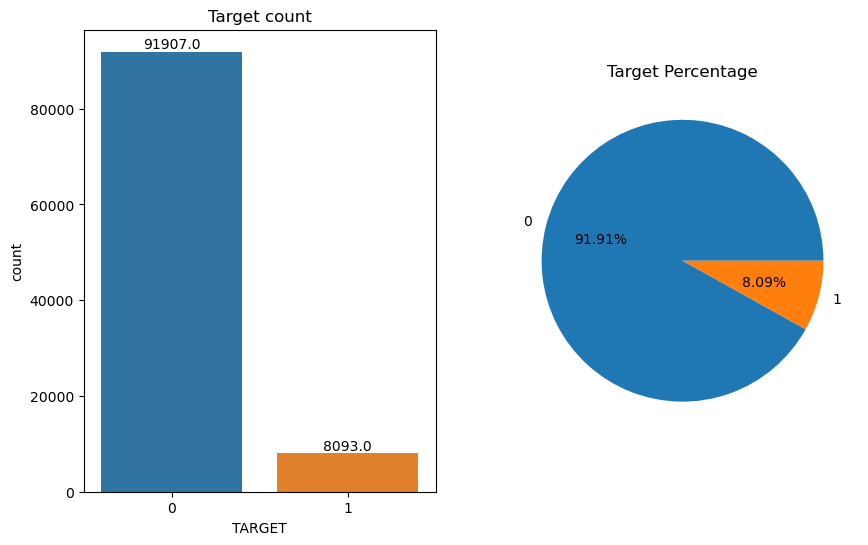

In [10]:
plt.figure(figsize=(10,6))

# Bar chart
plt.subplot(1, 2, 1)
sb.countplot(data=data, x='TARGET')
plt.title('Target count')
# Add count values on top of the bars
ax1 = plt.gca()
for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Pie chart 
plt.subplot(1, 2, 2)
business_travel_percentage = data['TARGET'].value_counts()
plt.pie(business_travel_percentage, labels=business_travel_percentage.index, autopct='%.2f%%')
plt.title('Target Percentage')
plt.show()

# Analysis of Name contract type

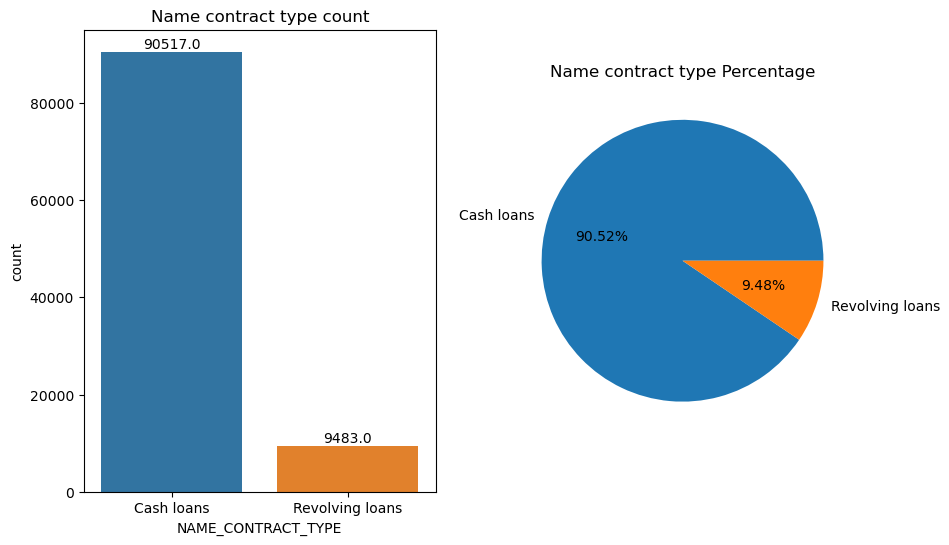

In [20]:
plt.figure(figsize=(10,6))

# Bar chart
plt.subplot(1, 2, 1)
sb.countplot(data=data, x='NAME_CONTRACT_TYPE')
plt.title('Name contract type count')
# Add count values on top of the bars
ax1 = plt.gca()
for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Pie chart 
plt.subplot(1, 2, 2)
business_travel_percentage = data['NAME_CONTRACT_TYPE'].value_counts()
plt.pie(business_travel_percentage, labels=business_travel_percentage.index, autopct='%.2f%%')
plt.title('Name contract type Percentage')
plt.show()

# Analysis of Gender

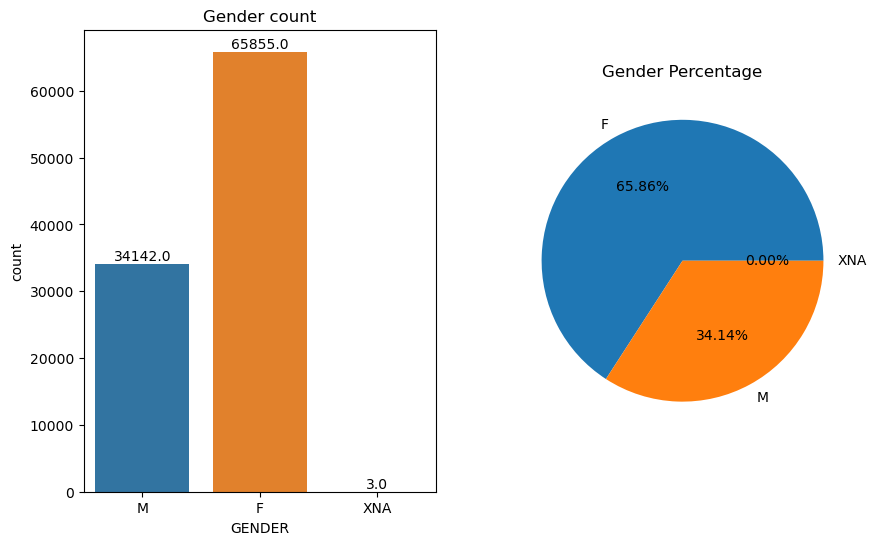

In [26]:
plt.figure(figsize=(10,6))

# Bar chart
plt.subplot(1, 2, 1)
sb.countplot(data=data, x='GENDER')
plt.title('Gender count')
# Add count values on top of the bars
ax1 = plt.gca()
for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Pie chart 
plt.subplot(1, 2, 2)
business_travel_percentage = data['GENDER'].value_counts()
plt.pie(business_travel_percentage, labels=business_travel_percentage.index, autopct='%.2f%%')
plt.title('Gender Percentage')
plt.show()

# Analysis of Car

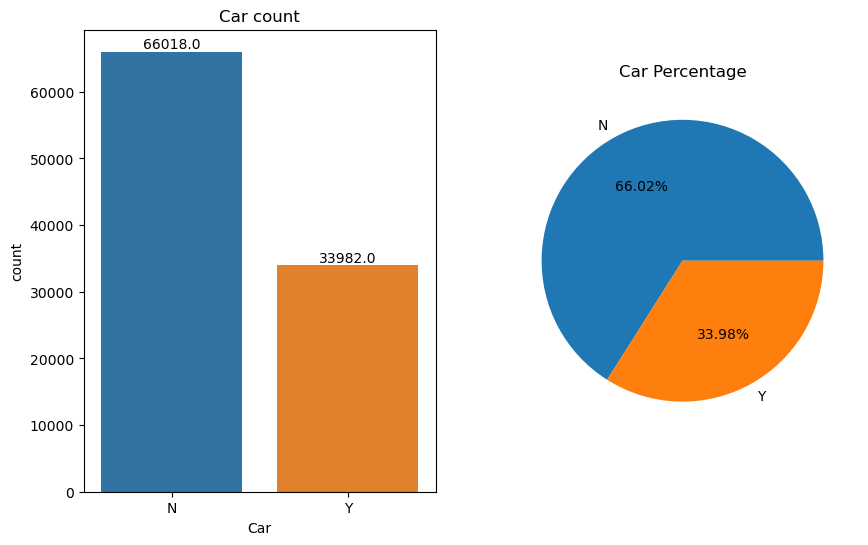

In [28]:
plt.figure(figsize=(10,6))

# Bar chart
plt.subplot(1, 2, 1)
sb.countplot(data=data, x='Car')
plt.title('Car count')
# Add count values on top of the bars
ax1 = plt.gca()
for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Pie chart 
plt.subplot(1, 2, 2)
business_travel_percentage = data['Car'].value_counts()
plt.pie(business_travel_percentage, labels=business_travel_percentage.index, autopct='%.2f%%')
plt.title('Car Percentage')
plt.show()

# Analysis of House

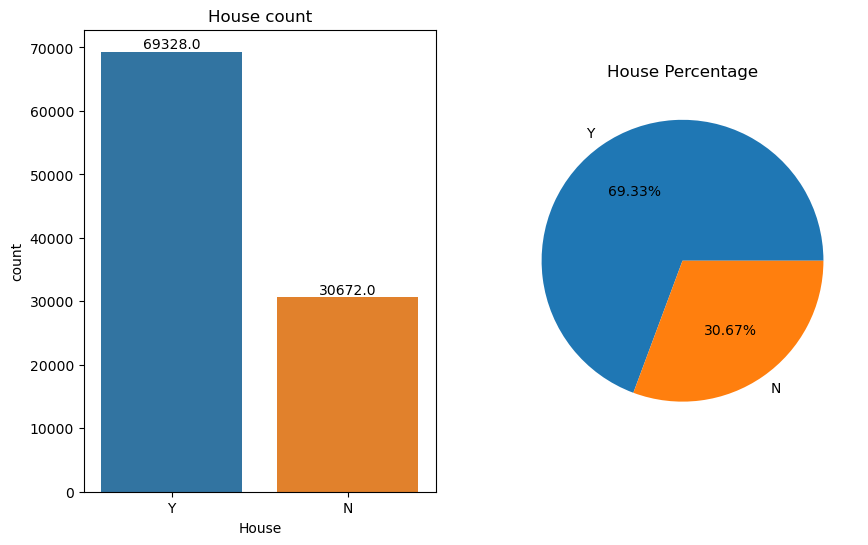

In [29]:
plt.figure(figsize=(10,6))

# Bar chart
plt.subplot(1, 2, 1)
sb.countplot(data=data, x='House')
plt.title('House count')
# Add count values on top of the bars
ax1 = plt.gca()
for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Pie chart 
plt.subplot(1, 2, 2)
business_travel_percentage = data['House'].value_counts()
plt.pie(business_travel_percentage, labels=business_travel_percentage.index, autopct='%.2f%%')
plt.title('House Percentage')
plt.show()

# Analysis of client children

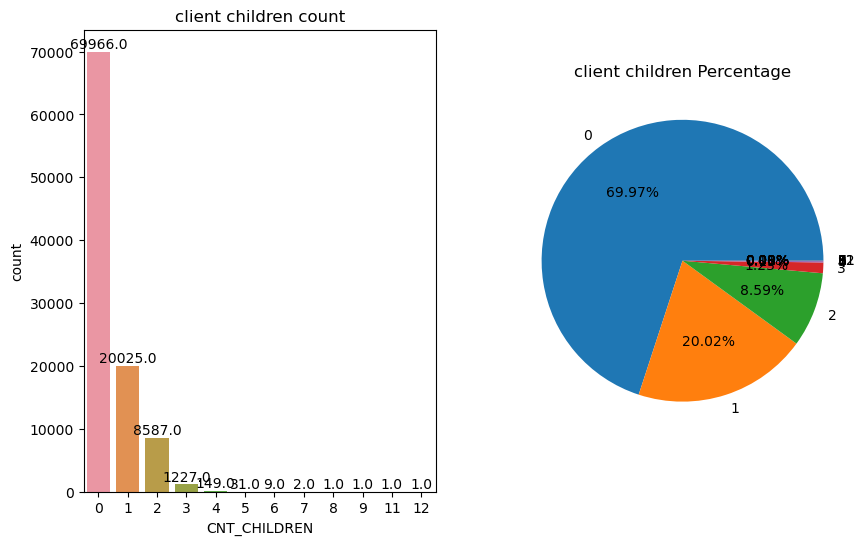

In [31]:
plt.figure(figsize=(10,6))

# Bar chart
plt.subplot(1, 2, 1)
sb.countplot(data=data, x='CNT_CHILDREN')
plt.title('client children count')
# Add count values on top of the bars
ax1 = plt.gca()
for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Pie chart 
plt.subplot(1, 2, 2)
business_travel_percentage = data['CNT_CHILDREN'].value_counts()
plt.pie(business_travel_percentage, labels=business_travel_percentage.index, autopct='%.2f%%')
plt.title('client children Percentage')
plt.show()

# Analysis of client suite

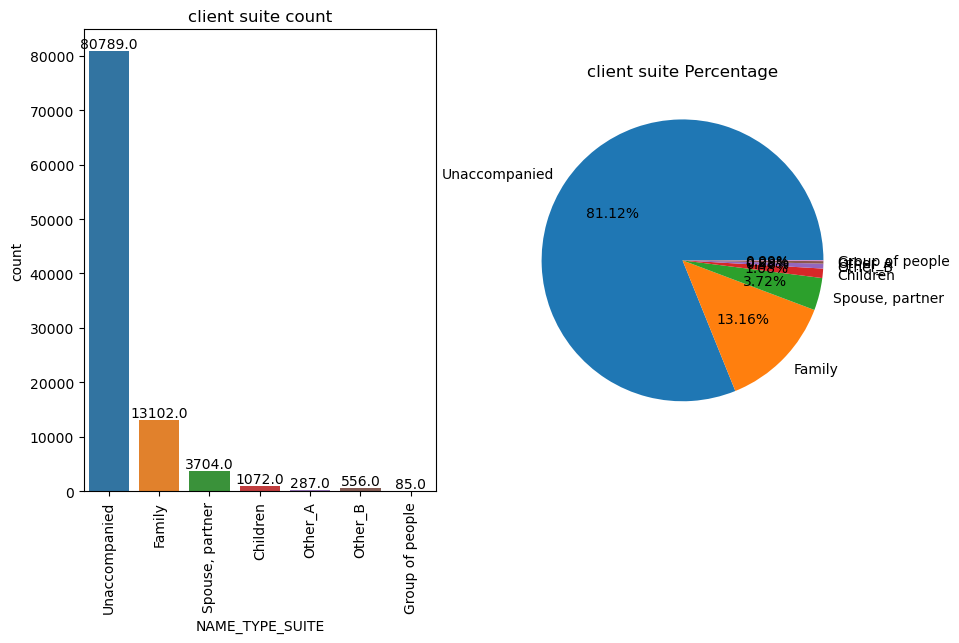

In [38]:
plt.figure(figsize=(10,6))

# Bar chart
plt.subplot(1, 2, 1)
sb.countplot(data=data, x='NAME_TYPE_SUITE')
plt.xticks(rotation=90)
plt.title('client suite count')
# Add count values on top of the bars
ax1 = plt.gca()
for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Pie chart 
plt.subplot(1, 2, 2)
business_travel_percentage = data['NAME_TYPE_SUITE'].value_counts()
plt.pie(business_travel_percentage, labels=business_travel_percentage.index, autopct='%.2f%%')
plt.title('client suite Percentage')
plt.show()

# Analysis of client Income

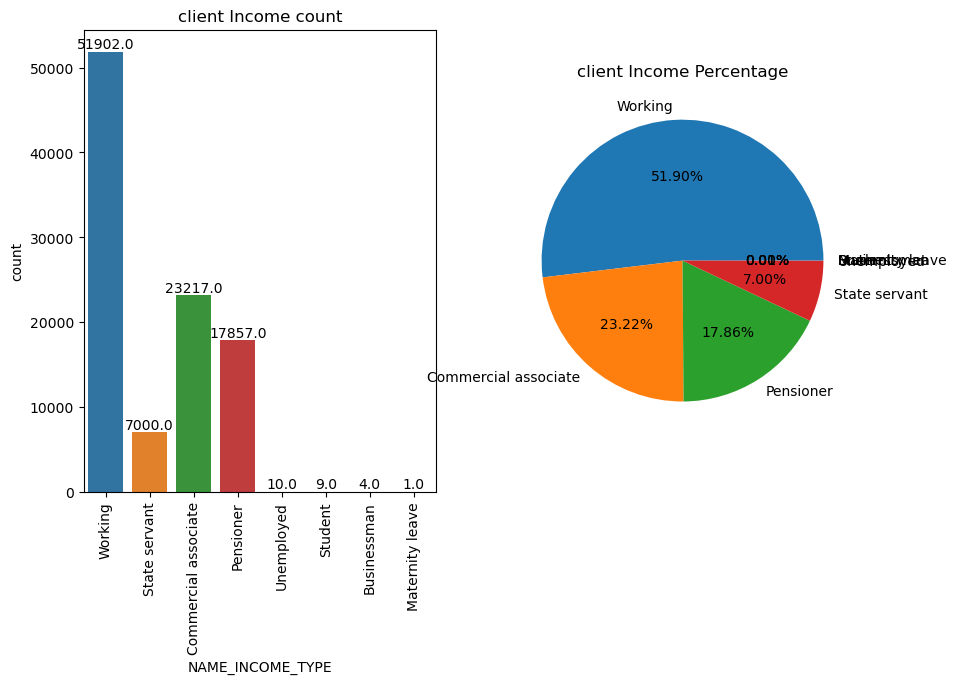

In [40]:
plt.figure(figsize=(10,6))

# Bar chart
plt.subplot(1, 2, 1)
sb.countplot(data=data, x='NAME_INCOME_TYPE')
plt.xticks(rotation=90)
plt.title('client Income count')
# Add count values on top of the bars
ax1 = plt.gca()
for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Pie chart 
plt.subplot(1, 2, 2)
business_travel_percentage = data['NAME_INCOME_TYPE'].value_counts()
plt.pie(business_travel_percentage, labels=business_travel_percentage.index, autopct='%.2f%%')
plt.title('client Income Percentage')
plt.show()

# Analysis of client Family status

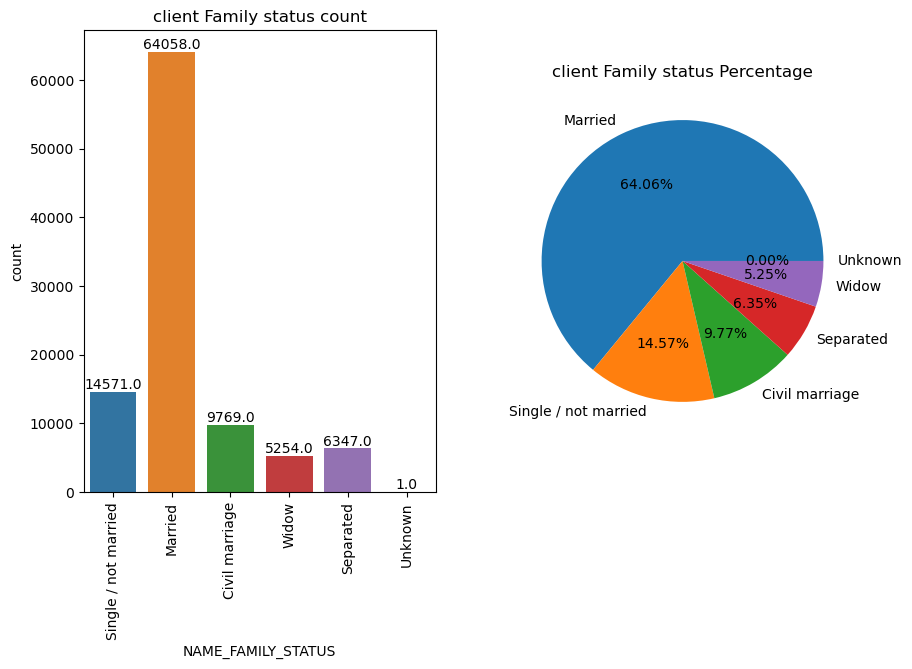

In [41]:
plt.figure(figsize=(10,6))

# Bar chart
plt.subplot(1, 2, 1)
sb.countplot(data=data, x='NAME_FAMILY_STATUS')
plt.xticks(rotation=90)
plt.title('client Family status count')
# Add count values on top of the bars
ax1 = plt.gca()
for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Pie chart 
plt.subplot(1, 2, 2)
business_travel_percentage = data['NAME_FAMILY_STATUS'].value_counts()
plt.pie(business_travel_percentage, labels=business_travel_percentage.index, autopct='%.2f%%')
plt.title('client Family status Percentage')
plt.show()

# Analysis of Mobile

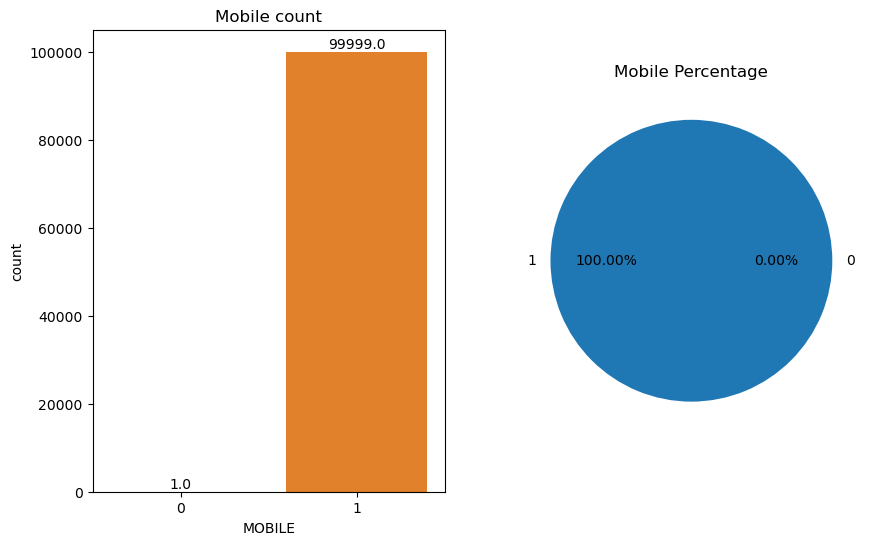

In [51]:
plt.figure(figsize=(10,6))

# Bar chart
plt.subplot(1, 2, 1)
sb.countplot(data=data, x='MOBILE')
plt.title('Mobile count')
# Add count values on top of the bars
ax1 = plt.gca()
for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Pie chart 
plt.subplot(1, 2, 2)
business_travel_percentage = data['MOBILE'].value_counts()
plt.pie(business_travel_percentage, labels=business_travel_percentage.index, autopct='%.2f%%')
plt.title('Mobile Percentage')
plt.show()

# Analysis of Work phone

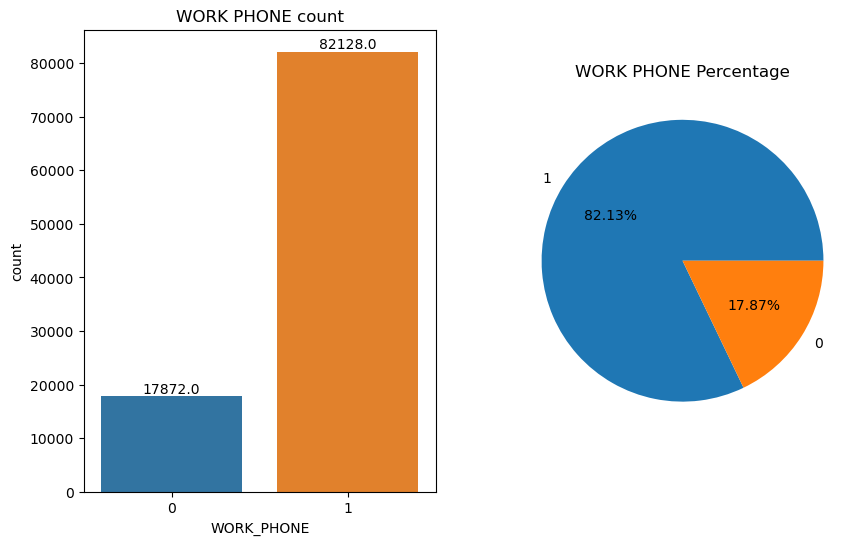

In [52]:
plt.figure(figsize=(10,6))

# Bar chart
plt.subplot(1, 2, 1)
sb.countplot(data=data, x='WORK_PHONE')
plt.title('WORK PHONE count')
# Add count values on top of the bars
ax1 = plt.gca()
for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Pie chart 
plt.subplot(1, 2, 2)
business_travel_percentage = data['WORK_PHONE'].value_counts()
plt.pie(business_travel_percentage, labels=business_travel_percentage.index, autopct='%.2f%%')
plt.title('WORK PHONE Percentage')
plt.show()

# Analysis of Home phone 

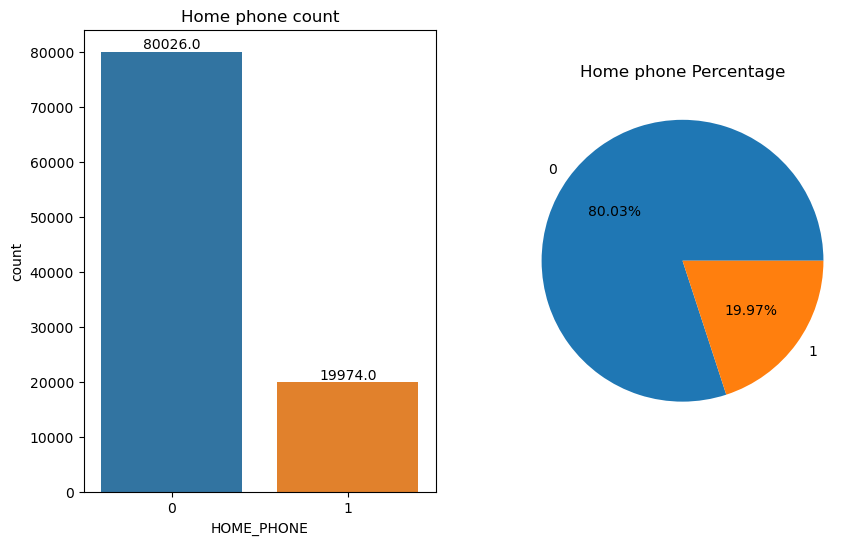

In [53]:
plt.figure(figsize=(10,6))

# Bar chart
plt.subplot(1, 2, 1)
sb.countplot(data=data, x='HOME_PHONE')
plt.title('Home phone count')
# Add count values on top of the bars
ax1 = plt.gca()
for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Pie chart 
plt.subplot(1, 2, 2)
business_travel_percentage = data['HOME_PHONE'].value_counts()
plt.pie(business_travel_percentage, labels=business_travel_percentage.index, autopct='%.2f%%')
plt.title('Home phone Percentage')
plt.show()

# Analysis of mobile reachable

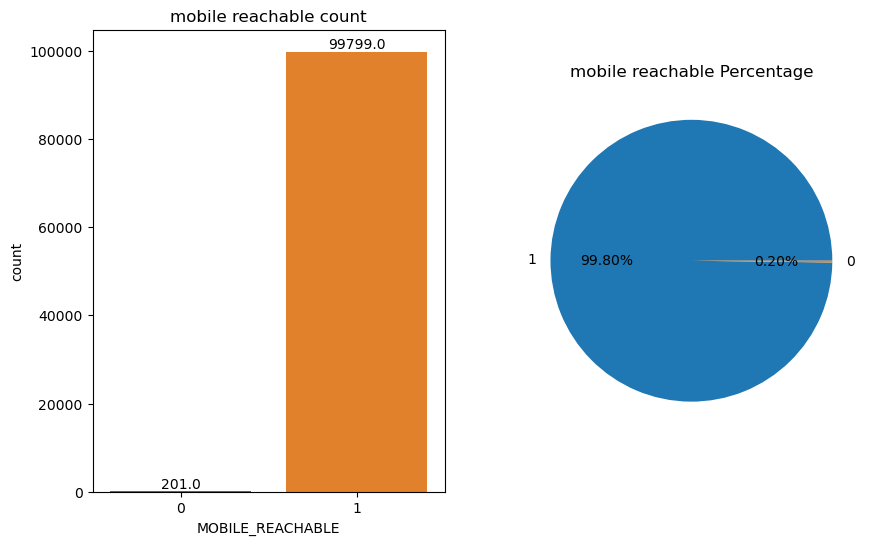

In [54]:
plt.figure(figsize=(10,6))

# Bar chart
plt.subplot(1, 2, 1)
sb.countplot(data=data, x='MOBILE_REACHABLE')
plt.title('mobile reachable count')
# Add count values on top of the bars
ax1 = plt.gca()
for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Pie chart 
plt.subplot(1, 2, 2)
business_travel_percentage = data['MOBILE_REACHABLE'].value_counts()
plt.pie(business_travel_percentage, labels=business_travel_percentage.index, autopct='%.2f%%')
plt.title('mobile reachable Percentage')
plt.show()

# Analysis of client email

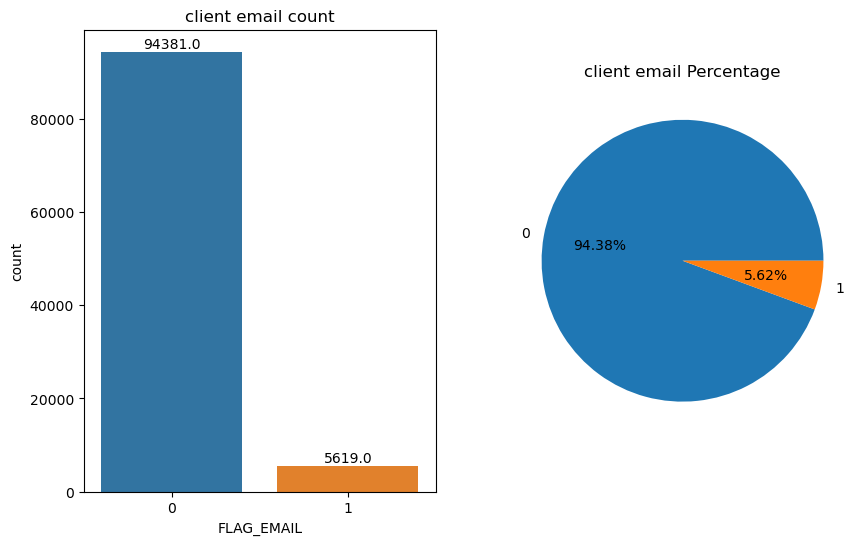

In [55]:
plt.figure(figsize=(10,6))

# Bar chart
plt.subplot(1, 2, 1)
sb.countplot(data=data, x='FLAG_EMAIL')
plt.title('client email count')
# Add count values on top of the bars
ax1 = plt.gca()
for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Pie chart 
plt.subplot(1, 2, 2)
business_travel_percentage = data['FLAG_EMAIL'].value_counts()
plt.pie(business_travel_percentage, labels=business_travel_percentage.index, autopct='%.2f%%')
plt.title('client email Percentage')
plt.show()

# Analysis of client occupation

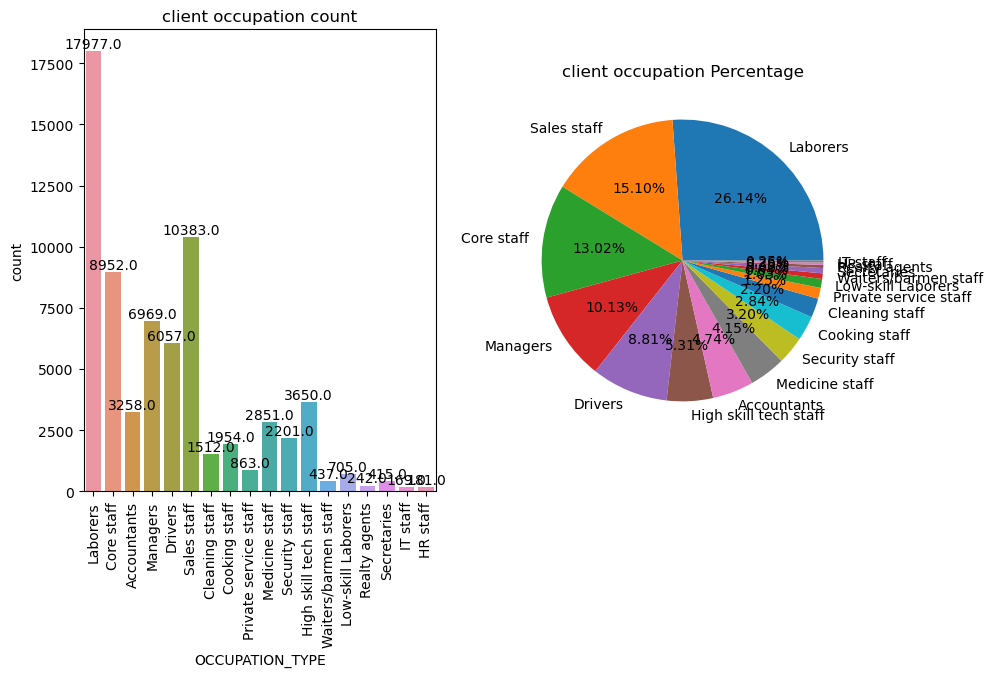

In [60]:
plt.figure(figsize=(10,6))

# Bar chart
plt.subplot(1, 2, 1)
sb.countplot(data=data, x='OCCUPATION_TYPE')
plt.xticks(rotation=90)
plt.title('client occupation count')
# Add count values on top of the bars
ax1 = plt.gca()
for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Pie chart 
plt.subplot(1, 2, 2)
business_travel_percentage = data['OCCUPATION_TYPE'].value_counts()
plt.pie(business_travel_percentage, labels=business_travel_percentage.index, autopct='%.2f%%')
plt.title('client occupation Percentage')
plt.show()

# Analysis of client family members

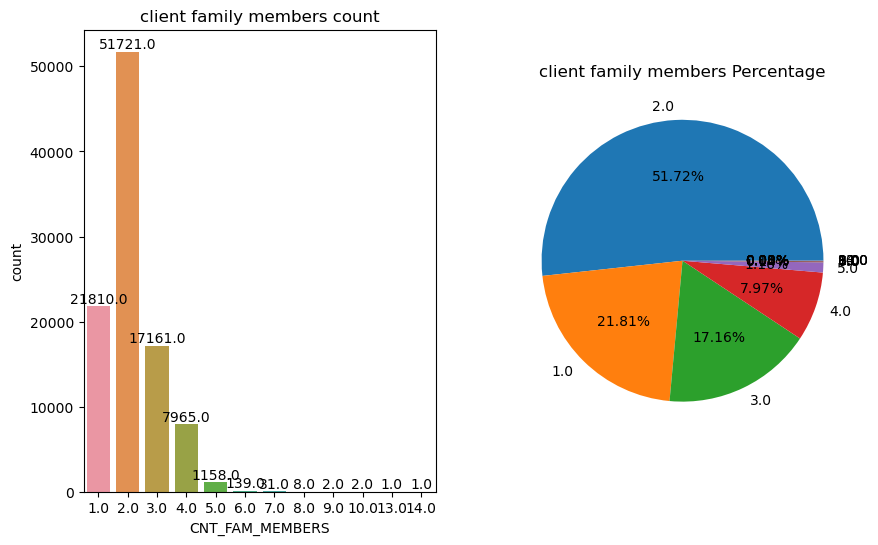

In [62]:
plt.figure(figsize=(10,6))

# Bar chart
plt.subplot(1, 2, 1)
sb.countplot(data=data, x='CNT_FAM_MEMBERS')
plt.title('client family members count')
# Add count values on top of the bars
ax1 = plt.gca()
for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Pie chart 
plt.subplot(1, 2, 2)
business_travel_percentage = data['CNT_FAM_MEMBERS'].value_counts()
plt.pie(business_travel_percentage, labels=business_travel_percentage.index, autopct='%.2f%%')
plt.title('client family members Percentage')
plt.show()

# Analysis of client apply for the loan

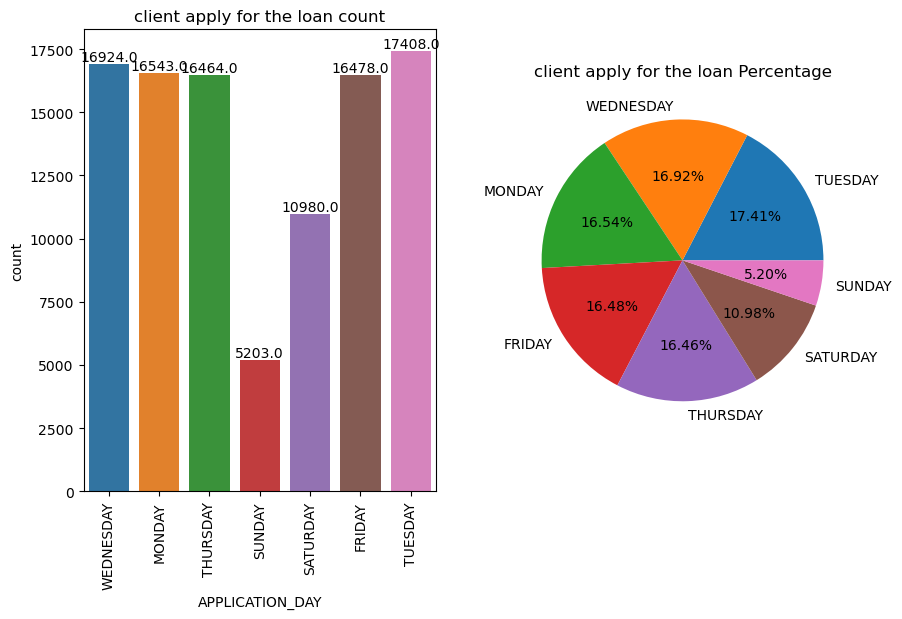

In [64]:
plt.figure(figsize=(10,6))

# Bar chart
plt.subplot(1, 2, 1)
sb.countplot(data=data, x='APPLICATION_DAY')
plt.xticks(rotation=90)
plt.title('client apply for the loan count')
# Add count values on top of the bars
ax1 = plt.gca()
for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Pie chart 
plt.subplot(1, 2, 2)
business_travel_percentage = data['APPLICATION_DAY'].value_counts()
plt.pie(business_travel_percentage, labels=business_travel_percentage.index, autopct='%.2f%%')
plt.title('client apply for the loan Percentage')
plt.show()

# Analysis of Number of documents

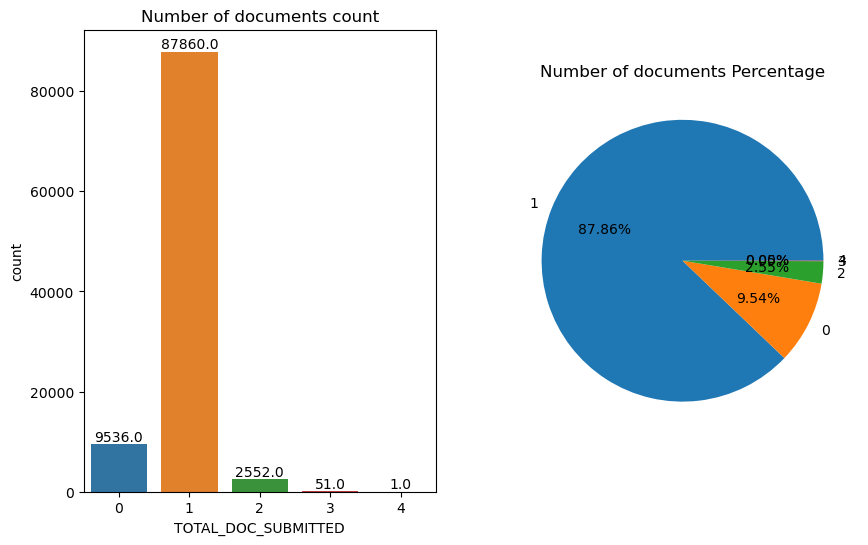

In [65]:
plt.figure(figsize=(10,6))

# Bar chart
plt.subplot(1, 2, 1)
sb.countplot(data=data, x='TOTAL_DOC_SUBMITTED')
plt.title('Number of documents count')
# Add count values on top of the bars
ax1 = plt.gca()
for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Pie chart 
plt.subplot(1, 2, 2)
business_travel_percentage = data['TOTAL_DOC_SUBMITTED'].value_counts()
plt.pie(business_travel_percentage, labels=business_travel_percentage.index, autopct='%.2f%%')
plt.title('Number of documents Percentage')
plt.show()

# Analysis of numarical columns

In [15]:
countinuous.columns

Index(['SK_ID_CURR', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'DAYS_EMPLOYED'],
      dtype='object')

In [16]:
for i in countinuous.columns:
    print('UNIQUE VALUES')
    print(f'{i}   : unique values: {countinuous[i].unique()}')
    print('MISSING VALUES')
    print(f'{i}   : missing values: {countinuous[i].isnull().sum()}') 
    if countinuous[i].isnull().sum()>0:
        countinuous[i].fillna(countinuous[i].mode[0],inplace=True)
    print('MODE VALUES')
    print(f'{i}   : unique values:  {countinuous[i].mode()}') 

UNIQUE VALUES
SK_ID_CURR   : unique values: [100002 100003 100004 ... 216088 216089 216090]
MISSING VALUES
SK_ID_CURR   : missing values: 0
MODE VALUES
SK_ID_CURR   : unique values:  0        100002
1        100003
2        100004
3        100006
4        100007
          ...  
68490    216086
68491    216087
68492    216088
68493    216089
68494    216090
Name: SK_ID_CURR, Length: 68495, dtype: int64
UNIQUE VALUES
AMT_INCOME_TOTAL   : unique values: [2.02500000e+05 2.70000000e+05 6.75000000e+04 1.35000000e+05
 1.21500000e+05 9.90000000e+04 1.71000000e+05 3.60000000e+05
 1.12500000e+05 2.25000000e+05 1.89000000e+05 1.57500000e+05
 1.08000000e+05 8.10000000e+04 9.00000000e+04 4.50000000e+05
 1.98000000e+05 1.80000000e+05 1.30500000e+05 5.40000000e+04
 5.40000000e+05 1.03500000e+05 9.45000000e+04 1.26000000e+05
 1.93500000e+05 7.65000000e+04 2.43000000e+05 1.62000000e+05
 2.47500000e+05 1.44000000e+05 2.92500000e+05 5.85000000e+04
 1.17000000e+05 3.15000000e+05 1.11915000e+05 1.64250000e

# Analysis of SK_ID_CURR

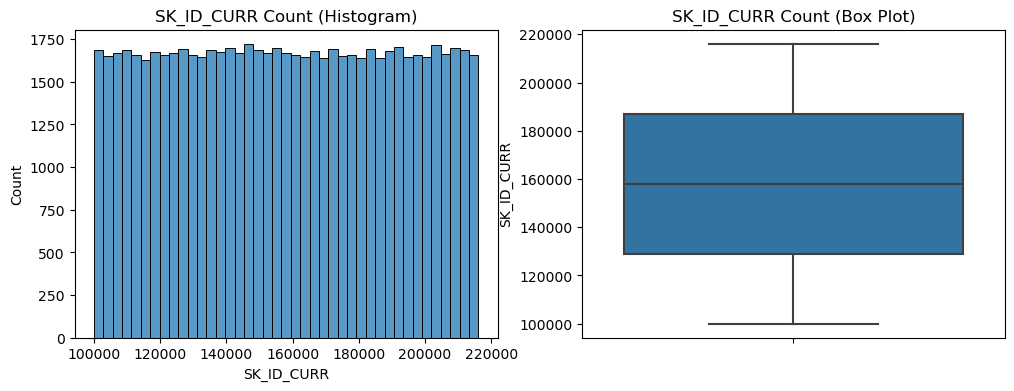

In [27]:
plt.figure(figsize=(12, 4))

# Histogram
plt.subplot(1, 2, 1)
sb.histplot(data=data, x='SK_ID_CURR')
plt.title('SK_ID_CURR Count (Histogram)')

# Box plot 
plt.subplot(1, 2, 2)
sb.boxplot(data=data, y='SK_ID_CURR')
plt.title('SK_ID_CURR Count (Box Plot)')
plt.show()

# Analysis of AMT_INCOME_TOTAL

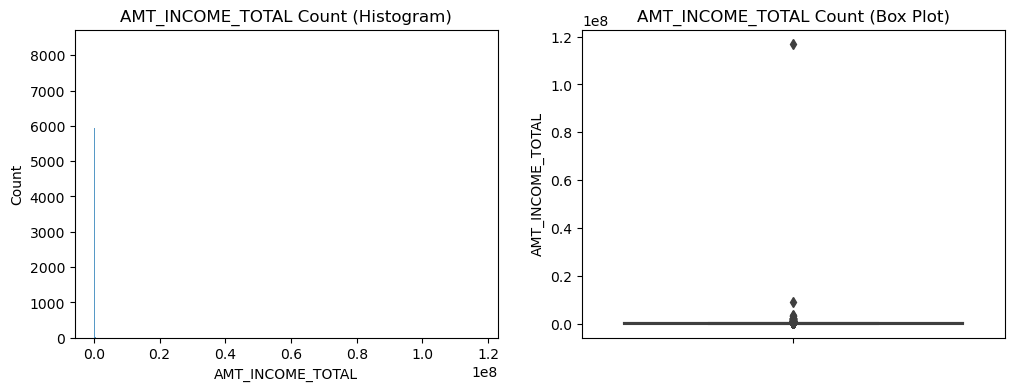

In [28]:
plt.figure(figsize=(12, 4))

# Histogram
plt.subplot(1, 2, 1)
sb.histplot(data=data, x='AMT_INCOME_TOTAL')
plt.title('AMT_INCOME_TOTAL Count (Histogram)')

# Box plot 
plt.subplot(1, 2, 2)
sb.boxplot(data=data, y='AMT_INCOME_TOTAL')
plt.title('AMT_INCOME_TOTAL Count (Box Plot)')
plt.show()

In [43]:
mean= countinuous['AMT_INCOME_TOTAL'].mean()
s=countinuous[countinuous['AMT_INCOME_TOTAL']>1000].index
for index in s:
    countinuous.loc[index,'AMT_INCOME_TOTAL']=mean

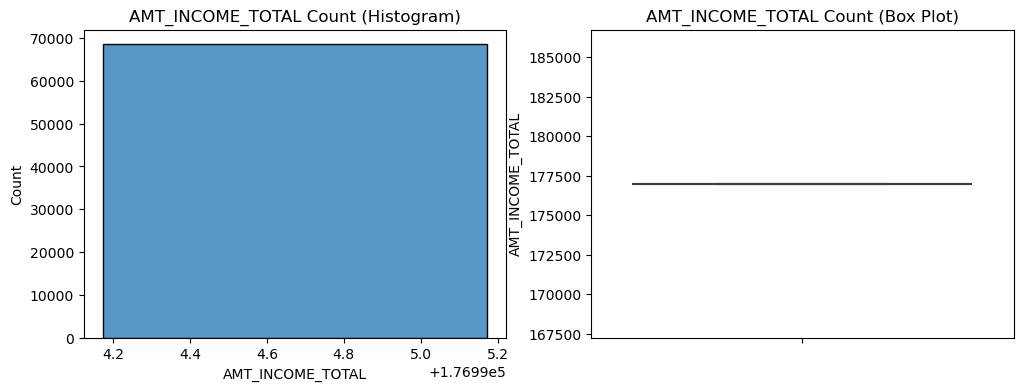

In [40]:
plt.figure(figsize=(12, 4))

# Histogram
plt.subplot(1, 2, 1)
sb.histplot(data=countinuous, x='AMT_INCOME_TOTAL')
plt.title('AMT_INCOME_TOTAL Count (Histogram)')

# Box plot 
plt.subplot(1, 2, 2)
sb.boxplot(data=countinuous, y='AMT_INCOME_TOTAL')
plt.title('AMT_INCOME_TOTAL Count (Box Plot)')
plt.show()

# Analysis of AMT_CREDIT

In [1]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sb.boxplot(y=countinuous['AMT_CREDIT'],ax=ax[0])
sb.histplot(x=countinuous['AMT_CREDIT'],ax=ax[1])
plt.tight_layout()
plt.tight_layout()
ax[0].set_title('BOXPLOT FOR AMT_CREDIT')
ax[1].set_title('HISTOGRAM FOR AMT_CREDIT')
plt.show()

NameError: name 'plt' is not defined

In [37]:
mean= countinuous['AMT_CREDIT'].mean()
s=countinuous[countinuous['AMT_CREDIT']>10000].index
for index in s:
    countinuous.loc[index,'AMT_CREDIT']=mean

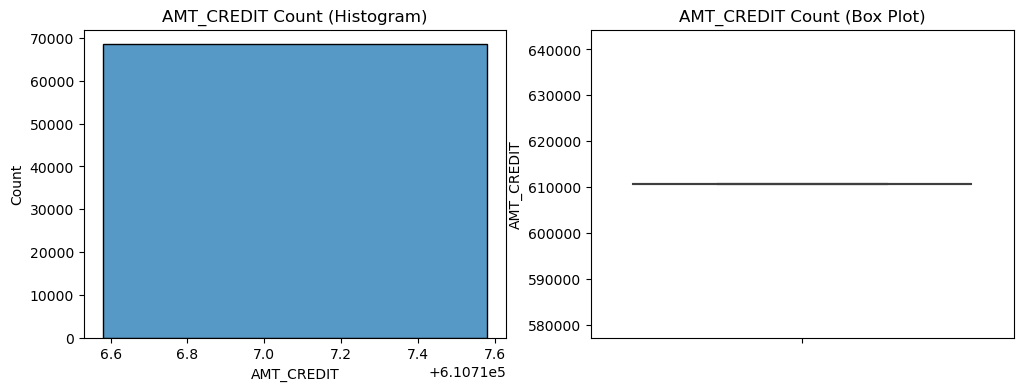

In [38]:
plt.figure(figsize=(12, 4))

# Histogram
plt.subplot(1, 2, 1)
sb.histplot(data=countinuous, x='AMT_CREDIT')
plt.title('AMT_CREDIT Count (Histogram)')

# Box plot 
plt.subplot(1, 2, 2)
sb.boxplot(data=countinuous, y='AMT_CREDIT')
plt.title('AMT_CREDIT Count (Box Plot)')
plt.show()

# Analysis of AMT_GOODS_PRICE

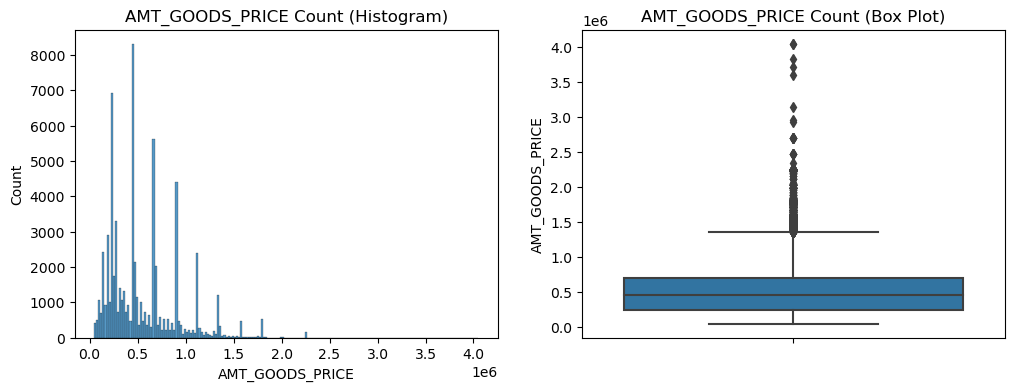

In [44]:
plt.figure(figsize=(12, 4))

# Histogram
plt.subplot(1, 2, 1)
sb.histplot(data=countinuous, x='AMT_GOODS_PRICE')
plt.title('AMT_GOODS_PRICE Count (Histogram)')

# Box plot 
plt.subplot(1, 2, 2)
sb.boxplot(data=countinuous, y='AMT_GOODS_PRICE')
plt.title('AMT_GOODS_PRICE Count (Box Plot)')
plt.show()

In [47]:
mean= countinuous['AMT_GOODS_PRICE'].mean()
s=countinuous[countinuous['AMT_GOODS_PRICE']>1000].index
for index in s:
    countinuous.loc[index,'AMT_GOODS_PRICE']=mean

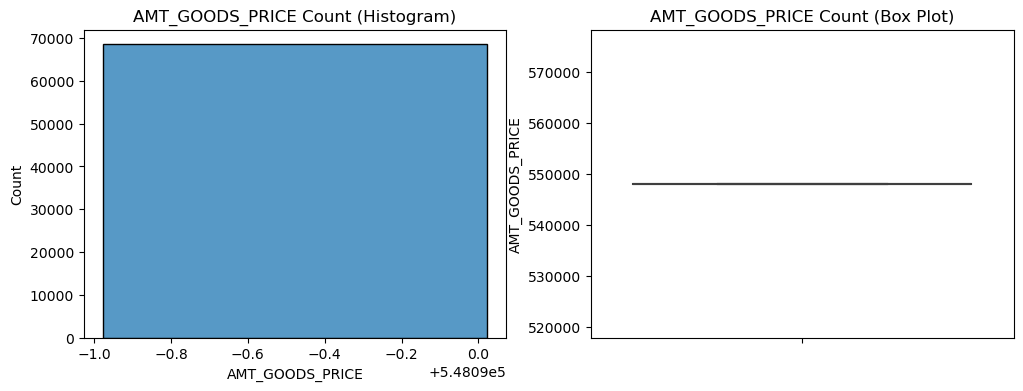

In [48]:
plt.figure(figsize=(12, 4))

# Histogram
plt.subplot(1, 2, 1)
sb.histplot(data=countinuous, x='AMT_GOODS_PRICE')
plt.title('AMT_GOODS_PRICE Count (Histogram)')

# Box plot 
plt.subplot(1, 2, 2)
sb.boxplot(data=countinuous, y='AMT_GOODS_PRICE')
plt.title('AMT_GOODS_PRICE Count (Box Plot)')
plt.show()

# Analysis of DAYS_EMPLOYED

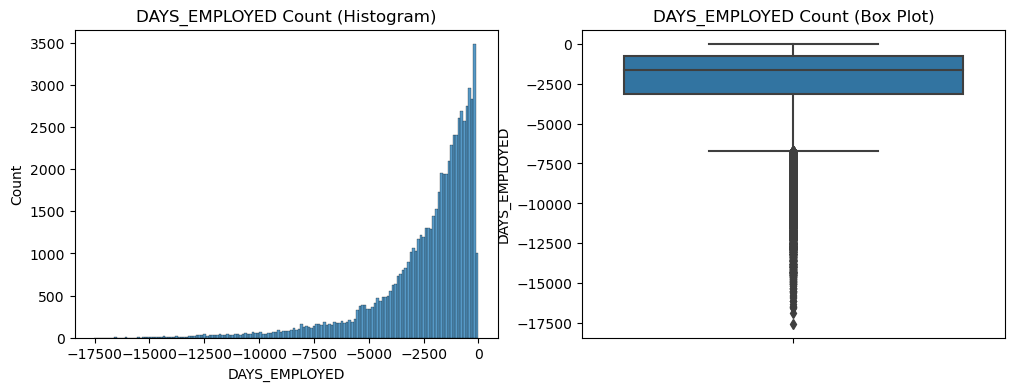

In [49]:
plt.figure(figsize=(12, 4))

# Histogram
plt.subplot(1, 2, 1)
sb.histplot(data=countinuous, x='DAYS_EMPLOYED')
plt.title('DAYS_EMPLOYED Count (Histogram)')

# Box plot 
plt.subplot(1, 2, 2)
sb.boxplot(data=countinuous, y='DAYS_EMPLOYED')
plt.title('DAYS_EMPLOYED Count (Box Plot)')
plt.show()

In [56]:
mean= countinuous['DAYS_EMPLOYED'].mean()
s=countinuous[countinuous['DAYS_EMPLOYED']>100].index
for index in s:
    countinuous.loc[index,'DAYS_EMPLOYED']=mean

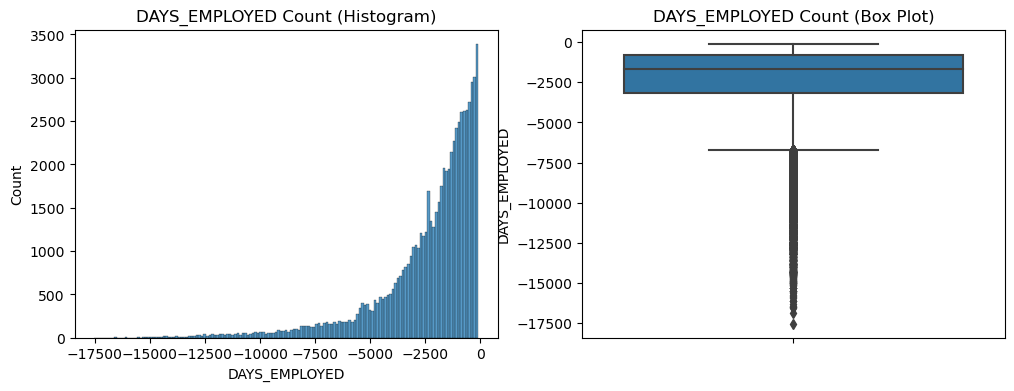

In [57]:
plt.figure(figsize=(12, 4))

# Histogram
plt.subplot(1, 2, 1)
sb.histplot(data=countinuous, x='DAYS_EMPLOYED')
plt.title('DAYS_EMPLOYED Count (Histogram)')

# Box plot 
plt.subplot(1, 2, 2)
sb.boxplot(data=countinuous, y='DAYS_EMPLOYED')
plt.title('DAYS_EMPLOYED Count (Box Plot)')
plt.show()

# ANALYSIS 2 BIVARIATE ANALYSIS

In [17]:
categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68495 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TARGET               68495 non-null  int64  
 1   NAME_CONTRACT_TYPE   68495 non-null  object 
 2   GENDER               68495 non-null  object 
 3   Car                  68495 non-null  object 
 4   House                68495 non-null  object 
 5   CNT_CHILDREN         68495 non-null  int64  
 6   NAME_TYPE_SUITE      68495 non-null  object 
 7   NAME_INCOME_TYPE     68495 non-null  object 
 8   NAME_EDUCATION_TYPE  68495 non-null  object 
 9   NAME_FAMILY_STATUS   68495 non-null  object 
 10  MOBILE               68495 non-null  int64  
 11  WORK_PHONE           68495 non-null  int64  
 12  HOME_PHONE           68495 non-null  int64  
 13  MOBILE_REACHABLE     68495 non-null  int64  
 14  FLAG_EMAIL           68495 non-null  int64  
 15  OCCUPATION_TYPE      68495 non-null 

# TARGET VS NAME_CONTRACT_TYPE AND GENDER

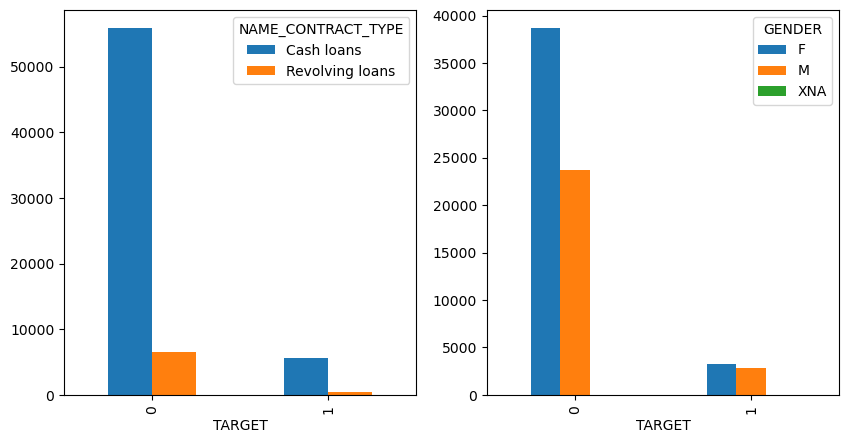

In [25]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
pd.crosstab(index=data['TARGET'],columns=data['NAME_CONTRACT_TYPE']).plot(kind='bar',ax=ax[0])   
pd.crosstab(index=data['TARGET'],columns=data['GENDER']).plot(kind='bar',ax=ax[1])    
plt.show()

# TARGET VS Car AND House

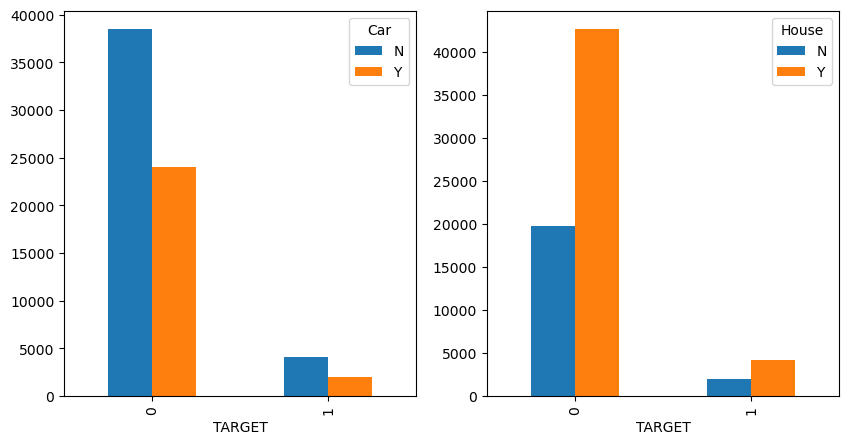

In [26]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
pd.crosstab(index=data['TARGET'],columns=data['Car']).plot(kind='bar',ax=ax[0])   
pd.crosstab(index=data['TARGET'],columns=data['House']).plot(kind='bar',ax=ax[1])    
plt.show()

# Target VS client children  and client suite

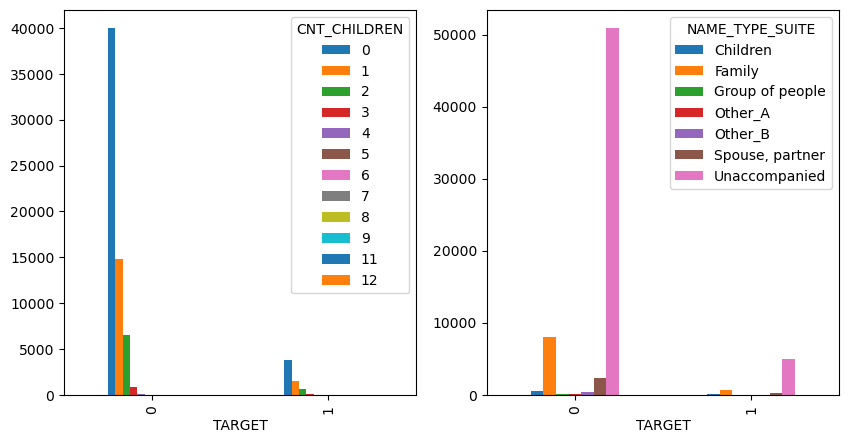

In [17]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
pd.crosstab(index=data['TARGET'],columns=data['CNT_CHILDREN']).plot(kind='bar',ax=ax[0])   
pd.crosstab(index=data['TARGET'],columns=data['NAME_TYPE_SUITE']).plot(kind='bar',ax=ax[1])    
plt.show()

# Target VS WORK PHONE and HOME PHONE

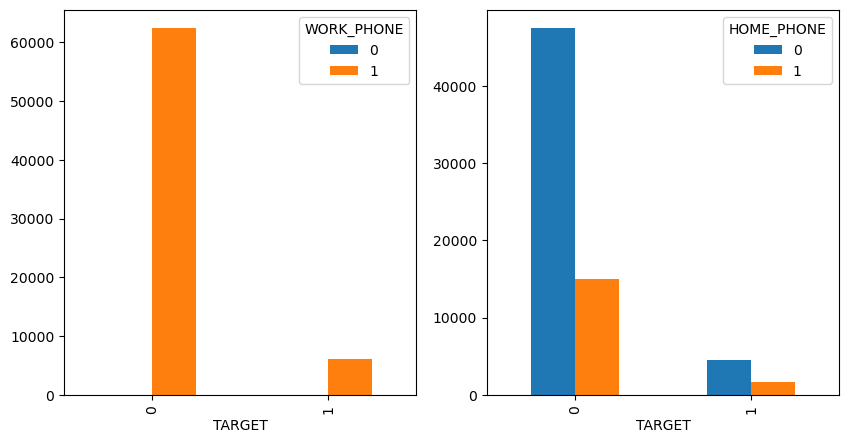

In [18]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
pd.crosstab(index=data['TARGET'],columns=data['WORK_PHONE']).plot(kind='bar',ax=ax[0])   
pd.crosstab(index=data['TARGET'],columns=data['HOME_PHONE']).plot(kind='bar',ax=ax[1])    
plt.show()

# target VS MOBILE REACHABLE and FLAG EMAIL

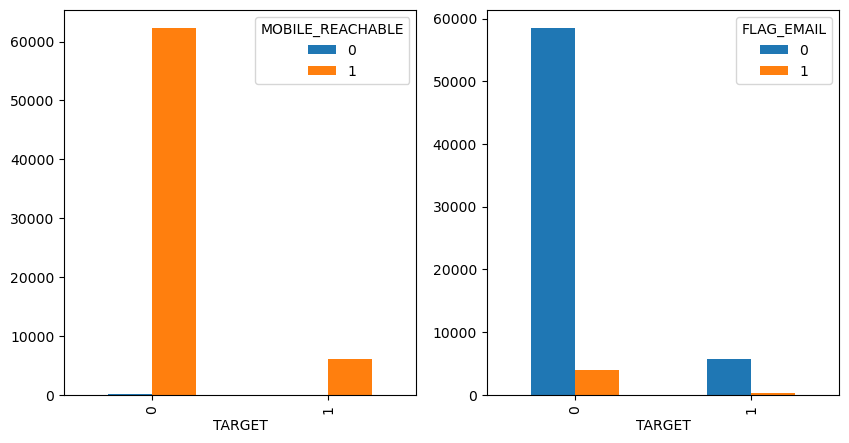

In [19]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
pd.crosstab(index=data['TARGET'],columns=data['MOBILE_REACHABLE']).plot(kind='bar',ax=ax[0])   
pd.crosstab(index=data['TARGET'],columns=data['FLAG_EMAIL']).plot(kind='bar',ax=ax[1])    
plt.show()

# WORK_PHONE VS MOBILE REACHABLE and FLAG EMAIL

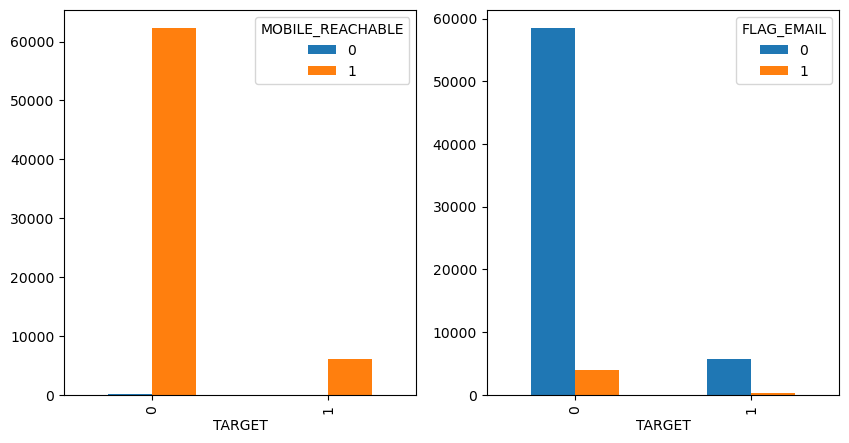

In [20]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
pd.crosstab(index=data['WORK_PHONE'],columns=data['MOBILE_REACHABLE']).plot(kind='bar',ax=ax[0])   
pd.crosstab(index=data['WORK_PHONE'],columns=data['FLAG_EMAIL']).plot(kind='bar',ax=ax[1])    
plt.show()

# TARGET VS OCCUPATION TYPE and APPLICATION_DAY

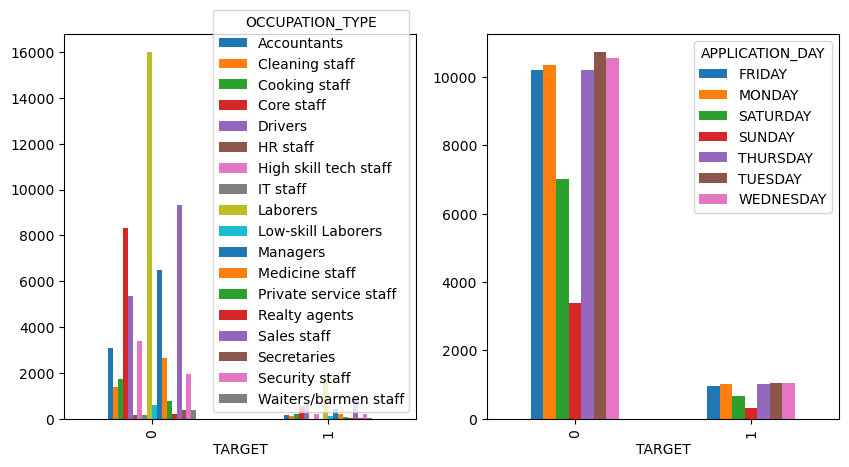

In [21]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
pd.crosstab(index=data['TARGET'],columns=data['OCCUPATION_TYPE']).plot(kind='bar',ax=ax[0])   
pd.crosstab(index=data['TARGET'],columns=data['APPLICATION_DAY']).plot(kind='bar',ax=ax[1])    
plt.show()

# TARGET VS TOTAL_DOC_SUBMITTED 

<Figure size 1000x600 with 0 Axes>

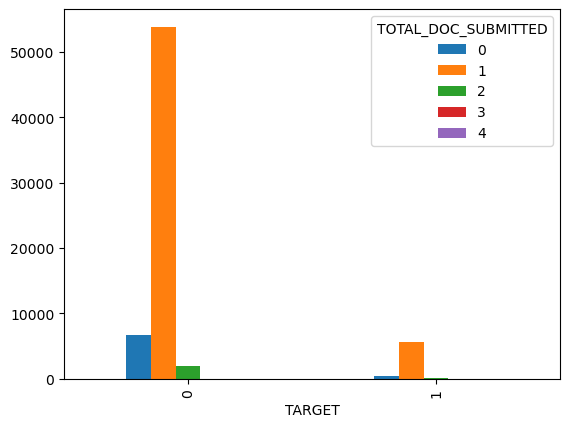

In [22]:
plt.figure(figsize=(10,6))
pd.crosstab(index=data['TARGET'],columns=data['TOTAL_DOC_SUBMITTED']).plot(kind='bar') 
plt.show()

# ANALYSIS 3 MULTI VARIATE

# TARGET VS Name contract type WITH GENDER

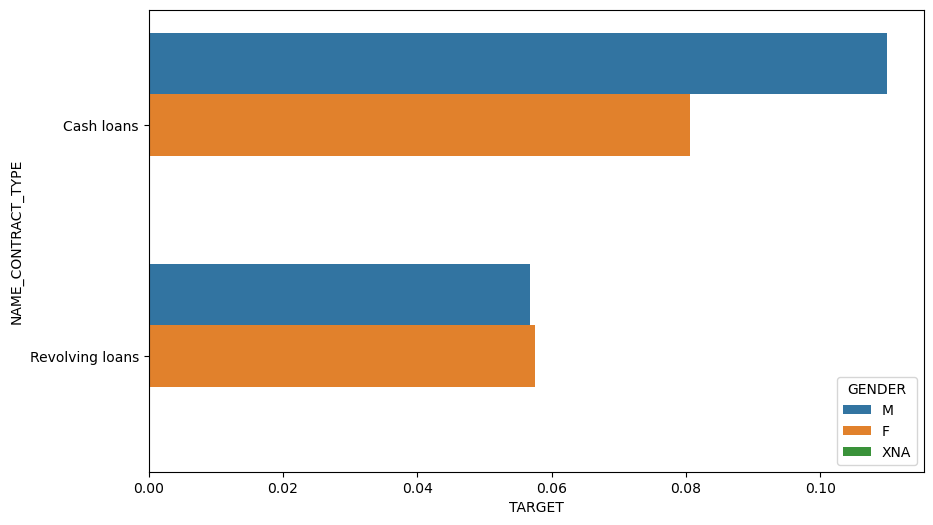

In [52]:
plt.figure(figsize=(10,6))
sb.barplot(data=data,x=data['TARGET'],y=data['NAME_CONTRACT_TYPE'],hue=data['GENDER'],ci=False)
plt.show()

# TARGET VS Car WITH House

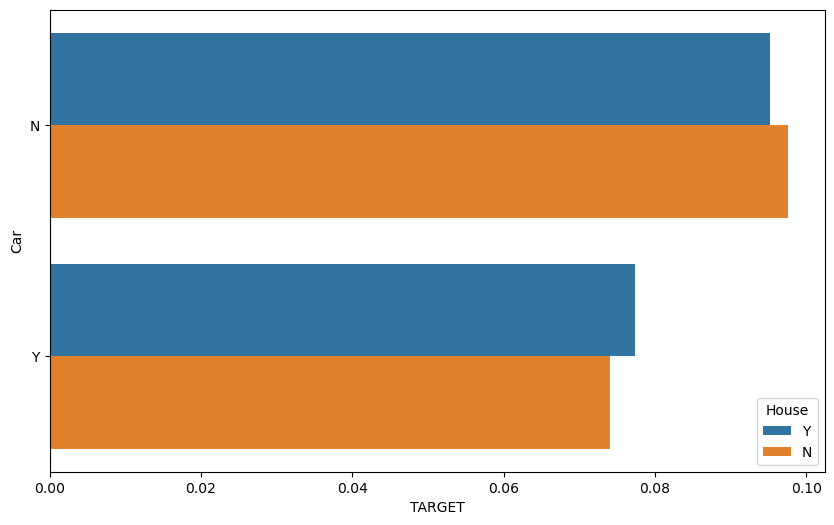

In [53]:
plt.figure(figsize=(10,6))
sb.barplot(data=data,x=data['TARGET'],y=data['Car'],hue=data['House'],ci=False)
plt.show()

# client Income VS client children with client suite

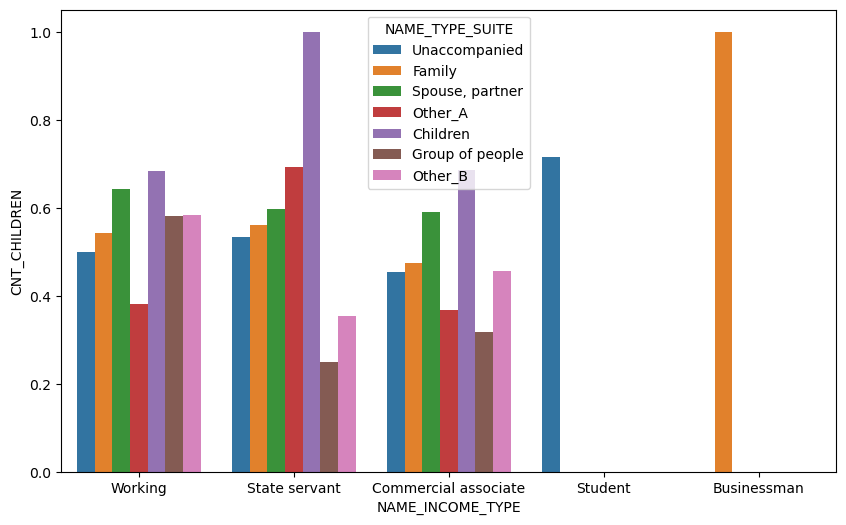

In [54]:
plt.figure(figsize=(10,6))
sb.barplot(data=data,x=data['NAME_INCOME_TYPE'],y=data['CNT_CHILDREN'],hue=data['NAME_TYPE_SUITE'],ci=False)
plt.show()

# MOBILE VS WORK PHONE with HOME PHONE

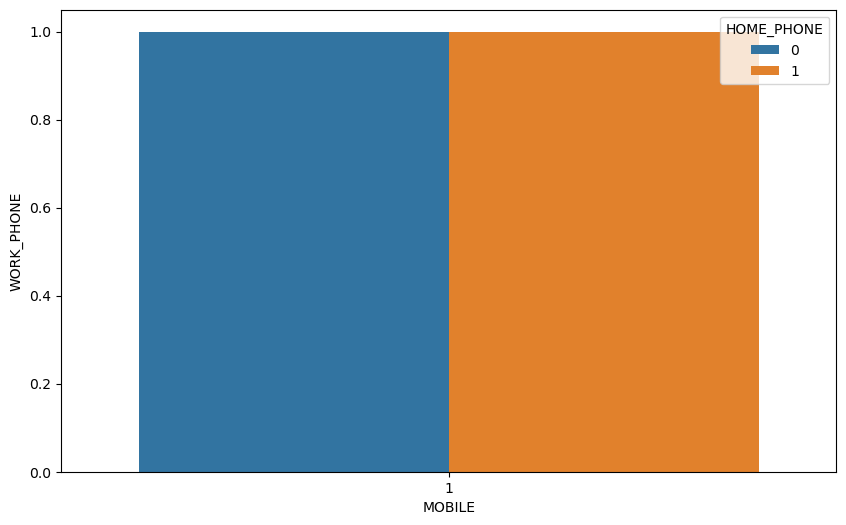

In [55]:
plt.figure(figsize=(10,6))
sb.barplot(data=data,x=data['MOBILE'],y=data['WORK_PHONE'],hue=data['HOME_PHONE'],ci=False)
plt.show()

# MOBILE VS MOBILE REACHABLE with FLAG EMAIL

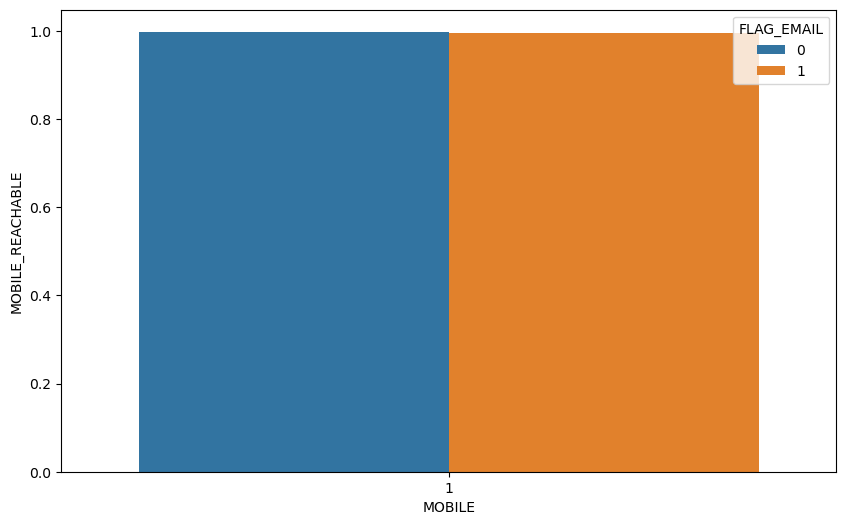

In [56]:
plt.figure(figsize=(10,6))
sb.barplot(data=data,x=data['MOBILE'],y=data['MOBILE_REACHABLE'],hue=data['FLAG_EMAIL'],ci=False)
plt.show()

In [ ]:
client family members VS OCCUPATION TYPE with APPLICATION_DAY

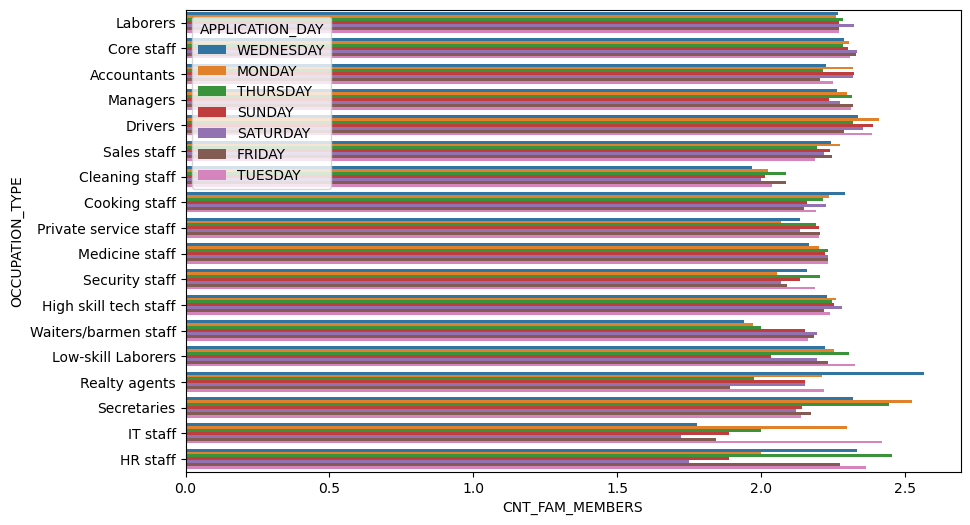

In [57]:
plt.figure(figsize=(10,6))
sb.barplot(data=data,x=data['CNT_FAM_MEMBERS'],y=data['OCCUPATION_TYPE'],hue=data['APPLICATION_DAY'],ci=False)
plt.show()

In [27]:
def separate(data):
    categorical = []
    countinuous = []
    
    for column in data.columns:
        if data[column].nunique() < 40:
            categorical.append(column)
        else:
            countinuous.append(column)
    
    return categorical,countinuous

categorical, countinuous = separate(data)

separate(data)

(['TARGET',
  'NAME_CONTRACT_TYPE',
  'GENDER',
  'Car',
  'House',
  'CNT_CHILDREN',
  'NAME_TYPE_SUITE',
  'NAME_INCOME_TYPE',
  'NAME_EDUCATION_TYPE',
  'NAME_FAMILY_STATUS',
  'MOBILE',
  'WORK_PHONE',
  'HOME_PHONE',
  'MOBILE_REACHABLE',
  'FLAG_EMAIL',
  'OCCUPATION_TYPE',
  'CNT_FAM_MEMBERS',
  'APPLICATION_DAY',
  'TOTAL_DOC_SUBMITTED'],
 ['SK_ID_CURR',
  'AMT_INCOME_TOTAL',
  'AMT_CREDIT',
  'AMT_GOODS_PRICE',
  'DAYS_EMPLOYED'])